In [5]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

### 1. Programmieraufgabe

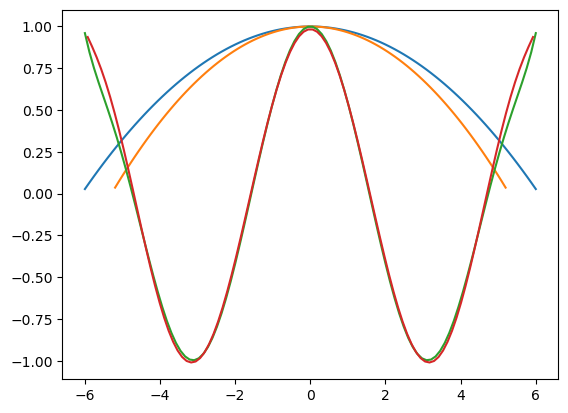

In [3]:
def interpoly(x, f):
    polynomial = np.poly1d(0)

    for i in range(len(x)):
        base_node = 1
        for j in range(len(x)):
            if i != j:
                base_node *= np.poly1d([1, -x[j]])/ (x[i]-x[j])
        polynomial += base_node * f[i]
    
    points = np.linspace(np.min(x), np.max(x), 100)
    points_f = [polynomial(point) for point in points]

    plt.plot(points, points_f)

f = lambda x: 1/(1+x**2)

x = np.linspace(-6, 6, 3)
y = np.array([f(point) for point in x])

interpoly(x, y)

# Funktion für Berechnung der Tschebyscheff-Stützstellen
t_nodes = lambda a, b, n, j: (a+b)/2 + (b-a)/2 * np.cos(((2*j - 1) / (2*(n+1))) * np.pi)

n = 2

x_T = np.array([t_nodes(-6, 6, n, j) for j in range(1, n+2)])
y_T = np.array([f(point) for point in x_T])

interpoly(x_T, y_T)

f = lambda x: np.cos(x)

x = np.linspace(-6, 6, 9)
y = np.array([f(point) for point in x])

interpoly(x, y)
n = 9
x_T = np.array([t_nodes(-6, 6, n, j) for j in range(1, n+2)])
y_T = np.array([f(point) for point in x_T])

interpoly(x_T, y_T)

### 2. Programmieraufgabe

In [4]:
#define complex random numbers
np.random.seed(42)
def complex_rand(n):
    return np.random.rand(n) + 1j * np.random.rand(n)   

def root_newton (f, df, guess, epsilon=1.0e-6):
    """ berechnet die Wurzel der gegebenen Gleichung mit der Newton-Methode 
        auf Epsilon genau gibt die Wurzel zurück, wenn sie gefunden wurde
    """
    dx = 2 * epsilon
    x = guess               
    while dx > epsilon:
        x1 = x - f(x)/df(x)
        dx = abs(x - x1)
        x = x1
    return x

In [141]:
from scipy import optimize
def polyzeros(a):
    """Alle Nullstellen des Polynoms a berechnen
    Args:
        a (_numpy_): numpy array mit den Koeffizienten des Polynoms
    """
    #Grad des Polynoms
    n = len(a) - 1
    print("Grad des Polynoms: ", n)
    nullstellen = np.zeros(n, dtype=complex)
    print("Nullstellen: ", nullstellen)
    
    #Erzeugen des Polynoms 
    p = np.poly1d(a)
    print(f'Function p(x) \n {p}')
    
    #Polynom ableiten und ausgeben / np.polyder() gibt nur Koeffizienten zurück
    p_dev = np.poly1d(np.polyder(a))
    print(f'Function p\'(x) \n {p_dev}')
    
    
    #Nullstellen mit Newton Verfahren berechnen
    
    # x = complex_rand(100)
    # root = optimize.newton(p_lambda,0,p_lambda_ableitung,maxiter=200)
    # print(f'Nullstelle: {root}\n')
    
    #Liste mit Nullstellen von p erstellen
    
    z = p.r
    print(f'\nNullstellen von p(x) mittels Newton:\n {z}\n')
    
    q_faktor = []
    for i in z:
        summe = np.poly1d([1, -i])
        q_faktor.append(summe)
        
    print(f'{q_faktor}\n')
    
    #Initialisierung der Daten
    
    tol = 10e-9
    
    dx = 2*tol
    
    xk = 0.5 + 0.9j
    
    #erste Vermutung der Nullstelle durch xk1 = xk - p(xk)/p'(xk) berechnen
    
    while dx > tol:
        xki = xk - p(xk)/p_dev(xk)
        dx = abs(xk - xki)
        xk = xki
    nullstellen[0] = xk
    
    print(f'Nullstelle 1: {xk}\n')
    
    for j in range(len(q_faktor)):
        print(j)
        #buscar en los nullstellen de p en el vector z y eliminarlo
        
        #z = np.delete(z, j)
        
        summe2=[]
        for i in range(len(q_faktor)-1):
            summe2.append(1/q_faktor[i](0))
        
        while dx > tol:
            xki = xk - p(xk)/p_dev(xk)
            dx = abs(xk - xki)
            xk = xki
        
    # summe2=[]
    # for i in range(len(q_faktor)-1):
    #     summe2.append(1/q_faktor[i](0))
    # # print(summe2)
    
    # summe3=[]
    # for i in range(1,len(summe2)+1):
    #     summe3.append(sum(summe2[:i]))
    # # print(summe3)
  
    

a = np.array([1, 0, 0, 0, -1])



#Prüfung für polyzeros
polyzeros(a)

Grad des Polynoms:  4
Nullstellen:  [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Function p(x) 
    4
1 x - 1
Function p'(x) 
    3
4 x

Nullstellen von p(x) mittels Newton:
 [-1.00000000e+00+0.j  6.44695442e-17+1.j  6.44695442e-17-1.j
  1.00000000e+00+0.j]

[poly1d([1.+0.j, 1.-0.j]), poly1d([ 1.00000000e+00+0.j, -6.44695442e-17-1.j]), poly1d([ 1.00000000e+00+0.j, -6.44695442e-17+1.j]), poly1d([ 1.+0.j, -1.-0.j])]

Nullstelle 1: (-5.803915999152586e-23+1j)

0
1
2
3


In [158]:
a = np.array([1, 0, 0, 0, -1])
p = np.poly1d(a)
xk = 0.5 + 0.9j
z = p.r

# q_faktor = lambda x: 1/(x-z[0]) 
# for i in range(len(z)):
#     summe = 1/(xk-z[i])
#     q_faktor = lambda x: q_faktor + 1/(x-z[i])
#     print(q_faktor(2))

q_faktor = []
for i in z:
    summe = np.poly1d([1, -i])
    q_faktor.append(summe)
    
print(q_faktor)
    
print(f'{1/q_faktor[0]} + {1/q_faktor[1]} + {1/q_faktor[2]} + {1/q_faktor[3]}')

summe2=[]
for i in range(len(q_faktor)-1):
    print(f'{1/q_faktor[i](0)}')
    summe2.append(1/q_faktor[i](0))
    
print(summe2)
summe3=[]
for i in range(1,len(summe2)+1):
    summe3.append(sum(summe2[:i]))

print(summe3)

xk = -5.803915999152586e-23+1j
for k in range(len(q_faktor)):
    
    if abs(xk-z[i]) < 10:
        print(f'Nullstelle {k+1}: {xk}')
        print(abs(xk-z[i]))
        


  

    


[poly1d([1.+0.j, 1.-0.j]), poly1d([ 1.00000000e+00+0.j, -6.44695442e-17-1.j]), poly1d([ 1.00000000e+00+0.j, -6.44695442e-17+1.j]), poly1d([ 1.+0.j, -1.-0.j])]
 
1 x + 1 +  
1 x + (-6.447e-17 + 1j) +  
1 x + (-6.447e-17 + -1j) +  
1 x - 1
(1+0j)
(-6.446954416950358e-17+1.0000000000000004j)
(-6.446954416950358e-17-1.0000000000000004j)
[(1+0j), (-6.446954416950358e-17+1.0000000000000004j), (-6.446954416950358e-17-1.0000000000000004j)]
[(1+0j), (0.9999999999999999+1.0000000000000004j), (0.9999999999999998+0j)]
Nullstelle 1: (-5.803915999152586e-23+1j)
1.4142135623730954
Nullstelle 2: (-5.803915999152586e-23+1j)
1.4142135623730954
Nullstelle 3: (-5.803915999152586e-23+1j)
1.4142135623730954
Nullstelle 4: (-5.803915999152586e-23+1j)
1.4142135623730954


In [6]:
f = lambda x, a: x**3 - a
fder = lambda x, a: 3 * x**2
rng = np.random.default_rng()
x = rng.standard_normal(100)
a = np.arange(-50, 50)
vec_res = optimize.newton(f, x, fprime=fder, args=(a, ), maxiter=200)


### 3. Programmieraufgabe

In [7]:
def ableitungsplot(f,a,b,n,h):
    # Wertepaare ausrechnen
    x = np.linspace(a,b,n)
    y = np.zeros(n, dtype=np.double) # Funktion
    y1 = np.zeros(n, dtype=np.double) # erste Ableitung
    y2 = np.zeros(n, dtype=np.double) # zweite Ableitung
    for i in range(n):
        y[i] = f(x[i])
        y1[i] = (f(x[i]+h)-f(x[i]-h))/(2*h)
        y2[i] = (f(x[i]-h)-2*f(x[i])+f(x[i]+h))/(h**2)
    
    # Plot der Funktionen
    plt.clf()
    plt.plot(x, y, color = 'black', linewidth=0.6, label="Funktion f(x)") 
    plt.plot(x, y1, color = 'blue', linewidth=0.6, label="Erste Ableitung f'(x)")
    plt.plot(x, y2, color = 'cyan', linewidth=0.6, label="Zweite Ableitung f''(x)")
    plt.legend(loc="upper right")
    plt.xlim(a,b)
    plt.xlabel("x") 
    plt.ylabel("y")
    plt.title("Plot der Funktion und den ersten beiden Ableitungen", pad ='15')
    plt.show() 

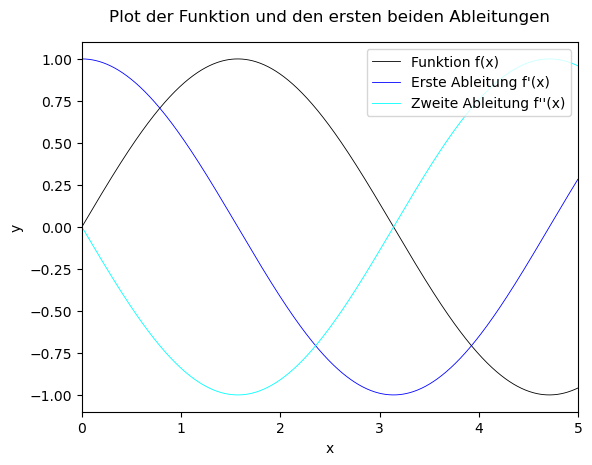

In [8]:
a = 0
b = 5
n = 1000
h = 0.001
def f(x):
    f = np.sin(x)
    return f

ableitungsplot(f,a,b,n,h)

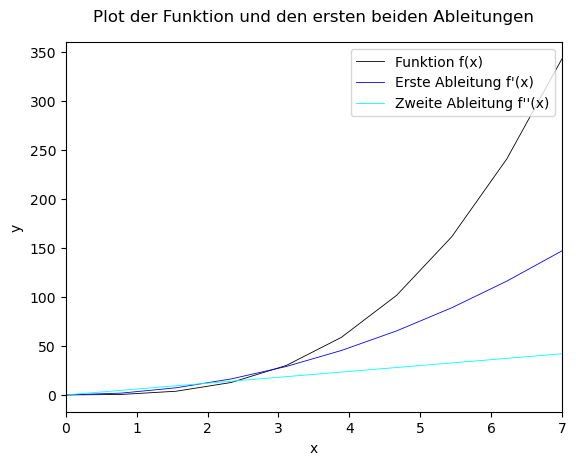

In [9]:
a = 0
b = 7
n = 10
h = 0.1
def f(x):
    f = x**3
    return f

ableitungsplot(f,a,b,n,h)

### 4. Programmieraufgabe

In [10]:
def integral(f,a,b,n):
    t = np.zeros(1, dtype=np.double)
    s = np.zeros(1, dtype=np.double)
    h = (b-a)/(n-1)
    x = np.array([a],dtype=np.double)
    for i in range(n):
        x = np.append(x, a+(i+1)*h)
        #summierte Trapezregel
        t = np.append(t, h/2*(f(x[i])+f(x[i+1])))
        #summierte Simpsonregel
        s = np.append(s, h / 6 * (f(x[i]) + 4 * f((x[i]+x[i+1]) / 2) + f(x[i + 1])))
    T = np.sum(t)   
    S = np.sum(s)
    return T,S

def f(x):
    f = x**3
    return f

In [11]:
a = 0
b = 1
n = 100
[T,S] = integral(f,a,b,n)
print("Nach der summierten Trapezregel gilt: T=",T)
print("Nach der summierten Simpsonregel gilt: S=", S)

Nach der summierten Trapezregel gilt: T= 0.26028111443019636
Nach der summierten Simpsonregel gilt: S= 0.2602550889213043
